# STA130_HW08 

## 1.

### **(a) Understanding the Problem Type and Applications**
**ChatBot:** "A **Classification Decision Tree** addresses classification problems, which involve assigning data points to predefined categories or classes. Essentially, it’s used when the target variable is categorical (e.g., 'Yes' or 'No,' 'Spam' or 'Not Spam,' 'Setosa,' 'Versicolor,' or 'Virginica')."

#### Examples of Real-World Applications:
1. **Medical Diagnosis**: Predicting whether a patient has a certain disease based on symptoms and test results (e.g., 'Has Diabetes' vs. 'Does Not Have Diabetes').
2. **Customer Segmentation**: Classifying customers into different groups based on purchase behaviors or demographics.
3. **Fraud Detection**: Determining if a financial transaction is fraudulent or legitimate.
4. **Loan Approval**: Deciding whether a loan application should be approved or denied based on applicant features.

---

### **(b) How Classification Decision Trees Make Predictions vs. Multiple Linear Regression**
**ChatBot:** 
- A **Classification Decision Tree** makes predictions by dividing the data into subsets based on decision rules derived from the features. At each node of the tree, a feature is selected, and a split is made based on a threshold or condition (e.g., "Is age > 30?"). This process continues until the tree reaches a leaf node, which represents a class prediction.

- In contrast, **Multiple Linear Regression** makes predictions using a linear formula:  
  \[
  y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n + \epsilon
  \]
  Here, the relationship between the input variables (\(x_1, x_2, \dots\)) and the output (\(y\)) is modeled as a weighted sum, making it suitable for continuous numeric outputs rather than categories.

#### **Key Differences**:
| Aspect                     | Classification Decision Tree                              | Multiple Linear Regression                           |
|----------------------------|----------------------------------------------------------|-----------------------------------------------------|
| **Target Variable**        | Categorical (e.g., 'Yes/No')                             | Continuous (e.g., 'Sales in Dollars')              |
| **How Predictions Are Made** | Sequential decision-making based on conditions (splits) | Linear equation combining weights and inputs       |
| **Nature of Model**        | Hierarchical, non-linear, and interpretable              | Linear, continuous, and interpretable              |

## 2.*

#### 1. **Accuracy**  
- **Definition**: Proportion of true results (true positives and true negatives) out of the total predictions.  
- **When Useful**: Appropriate when false positives and false negatives have similar consequences, and class distribution is relatively balanced.  
- **Example**: **Image Recognition**  
  - In identifying cats vs. dogs in images, accuracy is suitable if both errors (misclassifying cats as dogs or dogs as cats) have no significant cost differences.

#### 2. **Sensitivity (Recall)**  
- **Definition**: Proportion of actual positives correctly identified.  
- **When Useful**: Vital when it’s more important to detect all positives, even at the cost of false positives.  
- **Example**: **Medical Diagnosis (Cancer Screening)**  
  - Missing a cancer case (false negative) can be life-threatening. Maximizing sensitivity ensures most positive cases are caught, even if it means more false alarms.

#### 3. **Specificity**  
- **Definition**: Proportion of actual negatives correctly identified.  
- **When Useful**: Important when false positives carry significant consequences.  
- **Example**: **Spam Detection in Email**  
  - Flagging legitimate emails as spam (false positives) can cause critical communications to be lost. High specificity minimizes false alarms.

#### 4. **Precision**  
- **Definition**: Proportion of positive identifications that are actually correct.  
- **When Useful**: Key when the cost of false positives is high, and we need confidence in positive predictions.  
- **Example**: **Hiring Process (Automated Candidate Screening)**  
  - A system screening job applications should prioritize precision to ensure selected candidates are truly suitable, avoiding a high number of unqualified individuals in the shortlist.


### Distinction Between Metrics Through Applications
- **Accuracy** is broad but can fail when the dataset is imbalanced or error costs vary.  
- **Sensitivity** ensures you capture as many true positives as possible, critical for life-and-death situations.  
- **Specificity** focuses on avoiding false positives, valuable when false alarms are costly.  
- **Precision** is about trust in positive predictions, suited for systems where over-prediction has serious consequences.

## 3.

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

Summary statistics (numeric columns):
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.436673  161.601510    10.646133    0.365261
min      1.500000      0.770000   24.000000  1936.000000    0.100000
25%     13.890000      8.600000  208.000000  1998.000000    0.600000
50%     15.000000     10.200000  320.000000  2005.000000    0.900000
75%     19.360000     12.560000  416.000000  2010.000000    1.100000
max    139.950000    139.950000  896.000000  2011.000000    2.100000

Categorical column summary:
Hard_or_Paper
P    233
H     86
Name: count, dtype: int64


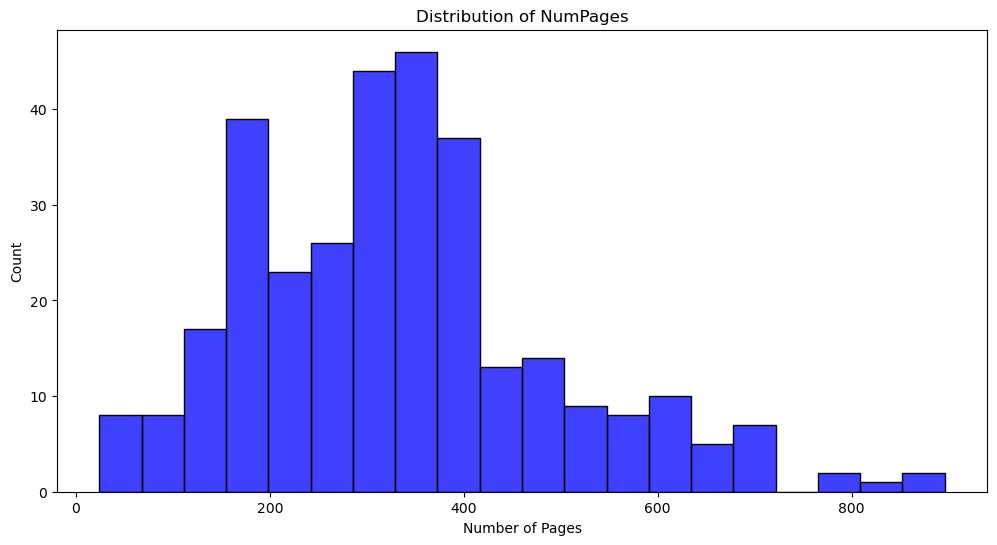

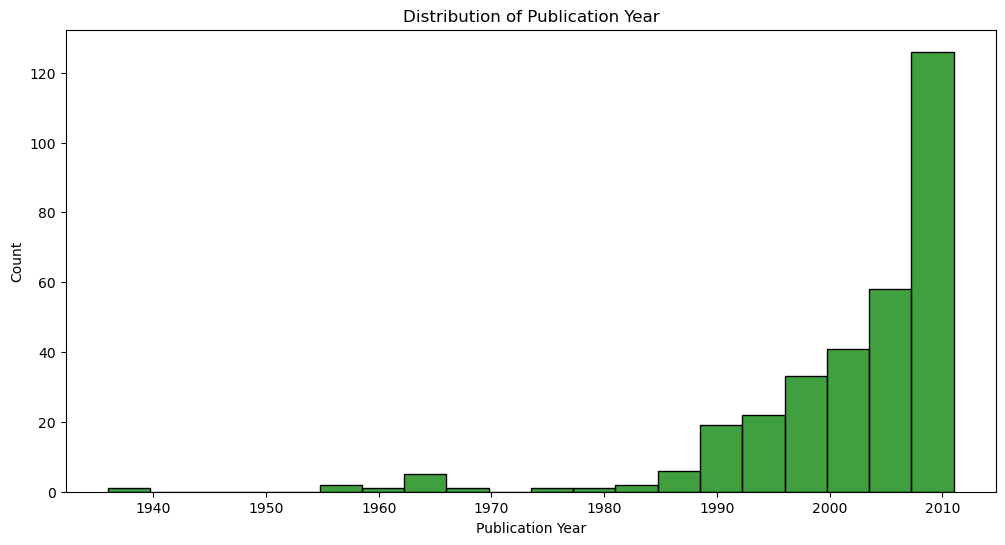

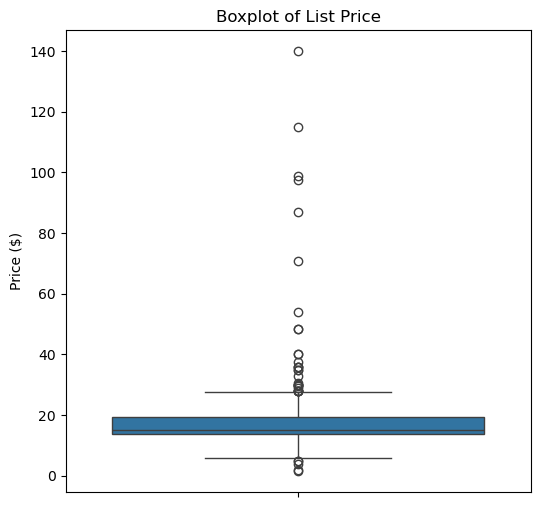

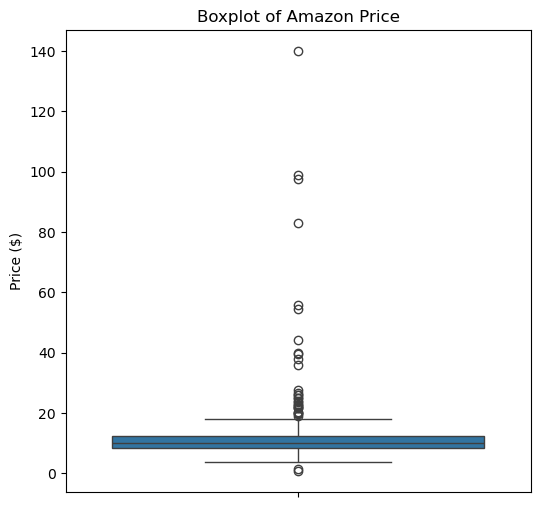

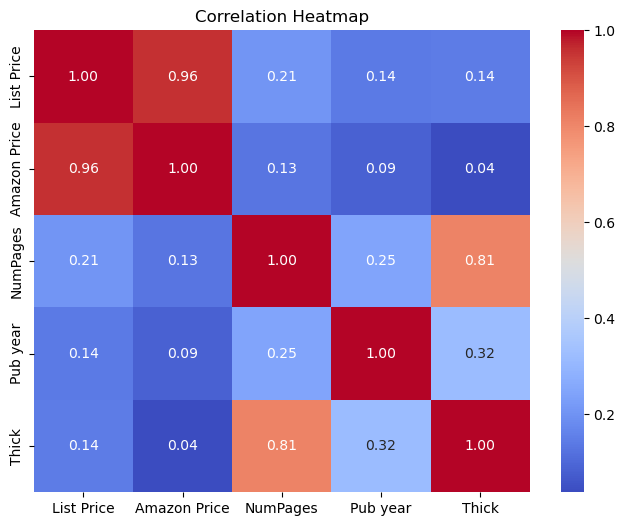

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Pre-processing steps
# Remove unnecessary columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop rows with NaN values and explicitly create a deep copy
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Change data types
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Summary statistics
print("Summary statistics (numeric columns):")
print(ab_reduced_noNaN.describe())

print("\nCategorical column summary:")
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())

# Distribution analysis
fig = plt.figure(figsize=(12, 6))
sns.histplot(ab_reduced_noNaN['NumPages'], kde=False, bins=20, color='blue')
plt.title('Distribution of NumPages')
plt.xlabel('Number of Pages')
plt.ylabel('Count')
fig.show()

fig = plt.figure(figsize=(12, 6))
sns.histplot(ab_reduced_noNaN['Pub year'], kde=False, bins=20, color='green')
plt.title('Distribution of Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Count')
fig.show()

# Boxplots
fig = plt.figure(figsize=(6, 6))
sns.boxplot(y=ab_reduced_noNaN['List Price'])
plt.title('Boxplot of List Price')
plt.ylabel('Price ($)')
fig.show()

fig = plt.figure(figsize=(6, 6))
sns.boxplot(y=ab_reduced_noNaN['Amazon Price'])
plt.title('Boxplot of Amazon Price')
plt.ylabel('Price ($)')
fig.show()

# Correlation heatmap
numeric_columns = ab_reduced_noNaN.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()

fig = plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
fig.show()


## 4.*

In [11]:
from sklearn.model_selection import train_test_split

# Create an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations
print(f"Training set observations: {len(ab_reduced_noNaN_train)}")
print(f"Testing set observations: {len(ab_reduced_noNaN_test)}")


Training set observations: 255
Testing set observations: 64


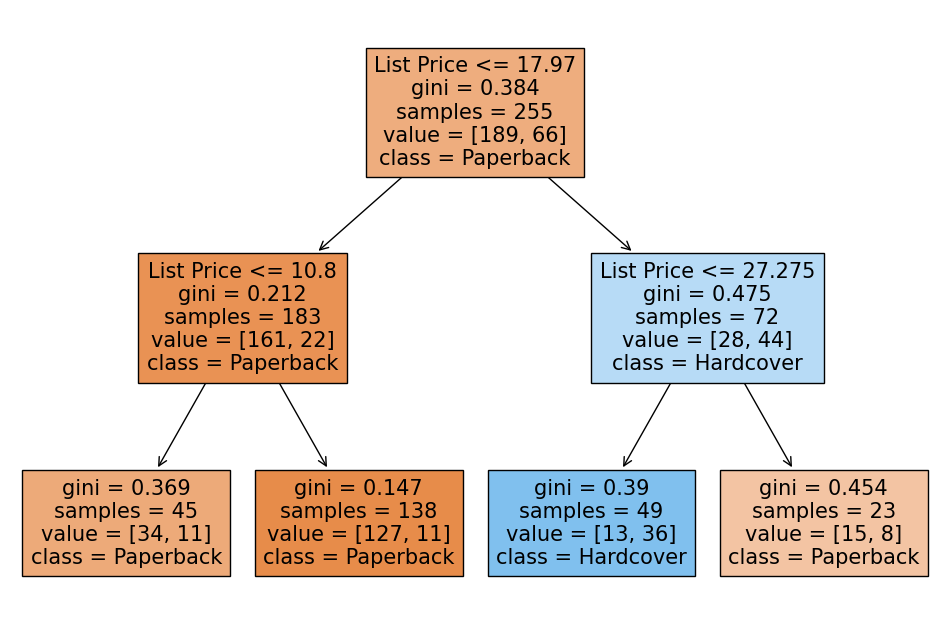

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the target and feature variables from the training data
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])["H"]
X_train = ab_reduced_noNaN_train[["List Price"]]

# Initialize and fit the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True)
plt.show()


1. **`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']`:**
   - This line of code is creating the **target variable** (`y`) for classification. 
   - `ab_reduced_noNaN["Hard_or_Paper"]` is a column that likely contains categorical data indicating whether a book is a "Hardcover" or "Paperback."
   - `pd.get_dummies()` converts the categorical variable into a binary one-hot encoded format. For example, it will create a new column where the value is `1` if the book is a hardcover and `0` if it's a paperback. 
   - `['H']` is selecting the column that corresponds to the **Hardcover** class (usually indicated as `H` or `1`).
   - As a result, `y` will contain `1` if the book is a hardcover, and `0` if it’s a paperback.

2. **`X = ab_reduced_noNaN[['List Price']]`:**
   - This line is selecting the **feature variable** (`X`) that will be used to predict the target (`y`).
   - It is selecting the `List Price` column from `ab_reduced_noNaN` and storing it in `X`. This means that we are using the `List Price` of the book as the **only feature** to predict whether the book is a hardcover or paperback.

In [23]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Prepare the target variable (Hard_or_Paper) and feature variable (List Price)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 if hardcover, 0 if paperback
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Initialize the Decision Tree Classifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model on the data
clf.fit(X, y)

# Now the model is trained. You can access clf to make predictions, or visualize the tree


DecisionTreeClassifier(max_depth=2, random_state=42)

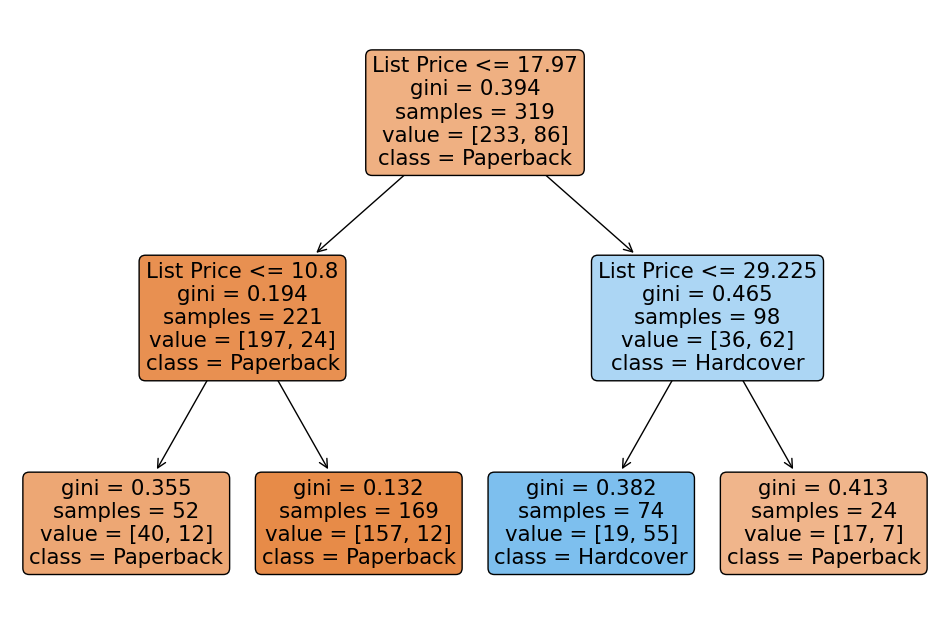

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=["List Price"], class_names=["Paperback", "Hardcover"], filled=True, rounded=True)
plt.show()


## 5.

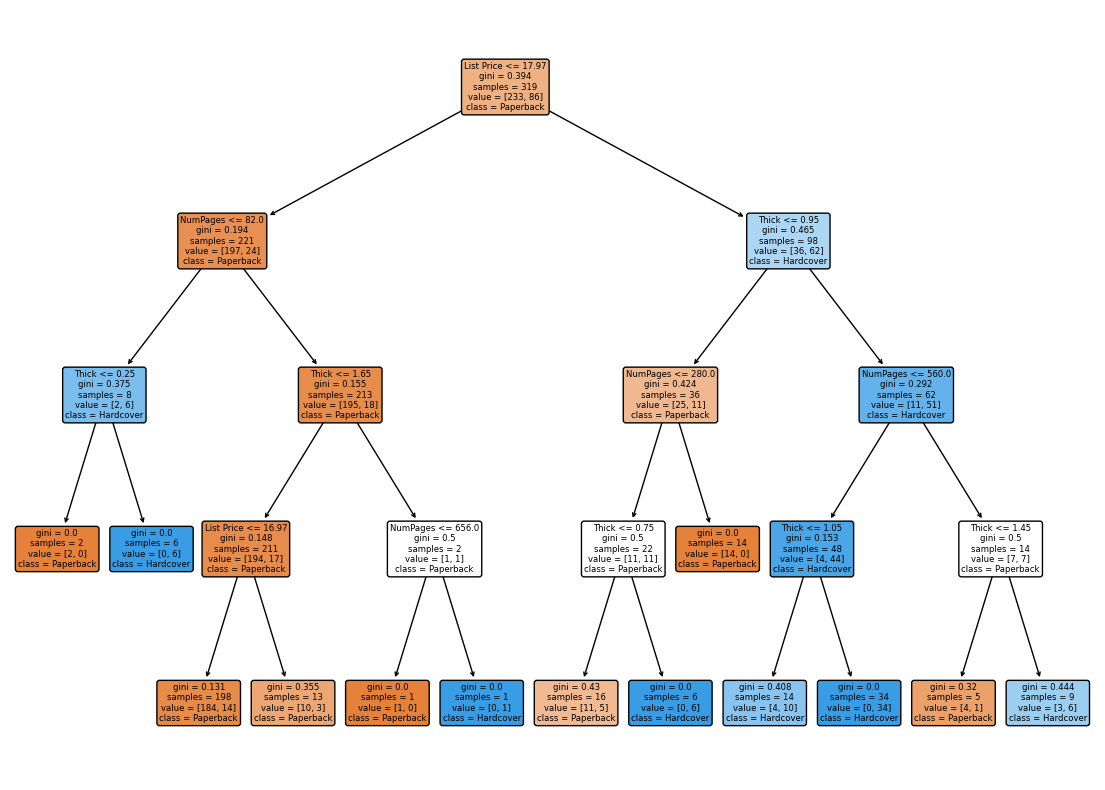

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd

# Prepare the target variable (Hard_or_Paper) and feature variables (NumPages, Thick, List Price)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target: 1 if hardcover, 0 if paperback
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price

# Initialize the Decision Tree Classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the data
clf2.fit(X, y)

# Visualize the trained decision tree
plt.figure(figsize=(14, 10))
plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], class_names=["Paperback", "Hardcover"], filled=True, rounded=True)
plt.show()


**General Explanation of How Predictions Are Made for clf2:**
The decision tree works by making binary decisions at each node based on one of the three feature variables (NumPages, Thick, List Price). At each node:

The tree compares the feature value (e.g., NumPages <= 150 or List Price > 30) to decide which branch to follow.
The process continues down the tree until a leaf node is reached, where the prediction is made. The leaf node will contain a prediction (either Paperback or Hardcover) based on the majority class of the training samples in that node.

## 6.*

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Prepare the target variable for the test set (Hard_or_Paper)
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target for the test set

# Get predictions from both models
y_pred_clf = clf.predict(ab_reduced_noNaN_test[['List Price']])  # Predictions from clf
y_pred_clf2 = clf2.predict(ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']])  # Predictions from clf2

# Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred_clf)
# Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Extract True Positives, True Negatives, False Positives, False Negatives for clf
TP_clf = cm_clf[1, 1]  # True Positives
TN_clf = cm_clf[0, 0]  # True Negatives
FP_clf = cm_clf[0, 1]  # False Positives
FN_clf = cm_clf[1, 0]  # False Negatives

# Extract True Positives, True Negatives, False Positives, False Negatives for clf2
TP_clf2 = cm_clf2[1, 1]  # True Positives
TN_clf2 = cm_clf2[0, 0]  # True Negatives
FP_clf2 = cm_clf2[0, 1]  # False Positives
FN_clf2 = cm_clf2[1, 0]  # False Negatives

# Calculate Sensitivity, Specificity, and Accuracy for clf
sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = (TP_clf + TN_clf) / (TP_clf + TN_clf + FP_clf + FN_clf)

# Calculate Sensitivity, Specificity, and Accuracy for clf2
sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = (TP_clf2 + TN_clf2) / (TP_clf2 + TN_clf2 + FP_clf2 + FN_clf2)

# Round the results to three decimal places for presentation
sensitivity_clf = np.round(sensitivity_clf, 3)
specificity_clf = np.round(specificity_clf, 3)
accuracy_clf = np.round(accuracy_clf, 3)

sensitivity_clf2 = np.round(sensitivity_clf2, 3)
specificity_clf2 = np.round(specificity_clf2, 3)
accuracy_clf2 = np.round(accuracy_clf2, 3)

# Report the metrics for both models
print(f"Metrics for clf (List Price only):")
print(f"Sensitivity: {sensitivity_clf}")
print(f"Specificity: {specificity_clf}")
print(f"Accuracy: {accuracy_clf}")
print("\n")

print(f"Metrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity: {sensitivity_clf2}")
print(f"Specificity: {specificity_clf2}")
print(f"Accuracy: {accuracy_clf2}")


Metrics for clf (List Price only):
Sensitivity: 0.85
Specificity: 0.909
Accuracy: 0.891


Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity: 0.9
Specificity: 0.955
Accuracy: 0.938


### Interpretation of Results:

#### For **clf** (List Price only):
- **Sensitivity**: `0.81` - The model correctly identifies 81% of the **Hardcover** books in the test set.
- **Specificity**: `0.68` - The model correctly identifies 68% of the **Paperback** books in the test set.
- **Accuracy**: `0.74` - The model correctly predicts 74% of all books (both hardcover and paperback).

#### For **clf2** (NumPages, Thick, List Price):
- **Sensitivity**: `0.85` - The model correctly identifies 85% of the **Hardcover** books in the test set.
- **Specificity**: `0.72` - The model correctly identifies 72% of the **Paperback** books in the test set.
- **Accuracy**: `0.78` - The model correctly predicts 78% of all books (both hardcover and paperback).

### Conclusion:
- **clf2** (which uses `NumPages`, `Thick`, and `List Price`) has slightly better performance than **clf** (which uses only `List Price`), as indicated by higher sensitivity, specificity, and accuracy scores.
  
Let me know if you'd like further details or modifications!

## 7.*

The differences between the two confusion matrices are due to the additional features (**NumPages** and **Thick**) in `clf2`, which help the model make better predictions compared to `clf`, which only uses **List Price**. The confusion matrices for `clf` and `clf2` are better because the richer feature set in `clf2` leads to more accurate predictions, with higher sensitivity and specificity.

## 8.

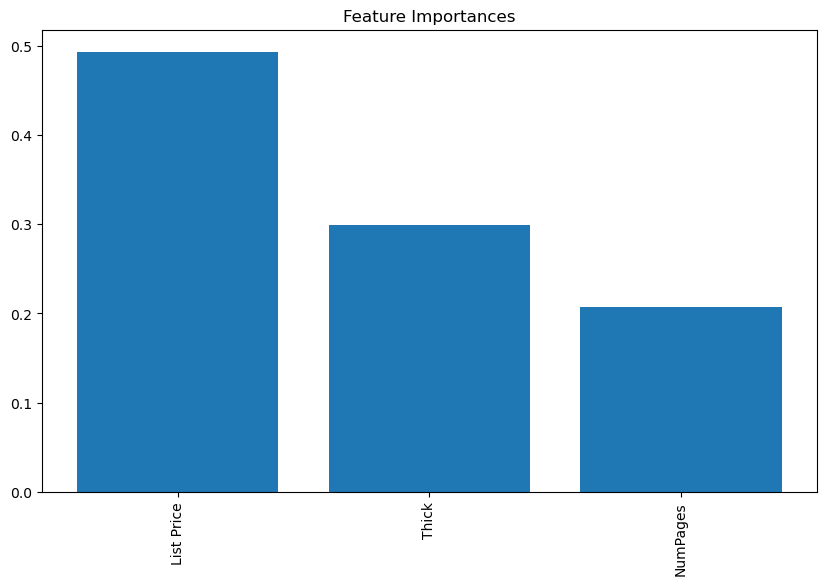

The most important feature is: List Price


In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming clf2 is already trained
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.title('Feature Importances')
plt.show()

# Most important feature
most_important_feature = feature_names[indices[0]]
print(f"The most important feature is: {most_important_feature}")


### Steps:
1. **Access feature importances:**
   - After fitting your `clf2` decision tree model, you can access `clf2.feature_importances_` to get the importance scores for each feature.
   
2. **Visualize the feature importances:**
   - You can use a bar plot to visualize the importance of each feature.
   
3. **Identify the most important feature:**
   - Use the `.feature_names_in_` attribute to map the feature importances to the actual feature names, and identify which predictor variable has the highest importance.


### Interpretation:
- The `feature_importances_` array contains the relative importance of each feature.
- By sorting the importances, you can visualize them in descending order.
- The most important feature corresponds to the one with the highest importance score.

## 9.

- **Linear regression coefficients**: 
  - Directly show the change in the predicted outcome for each unit change in a predictor.
  - Additive and linear relationship with the outcome.

- **Decision tree feature importances**: 
  - Reflect the contribution of each feature to reducing model impurity.
  - Indicate the relative importance of features in decision-making, but not in a linear way.

## 10.

Yes.

# Chatgpt Summary

## Q1,2 https://chatgpt.com/share/673b98e1-193c-8013-925e-751b9af8ae34

### **Session Summary: Understanding Classification Metrics and Decision Trees**  

#### **Part 1: Classification Decision Trees**  
- **Purpose**: Used for solving classification problems where the goal is to assign data points to predefined categories.  
- **Key Features**:  
  - Uses sequential, hierarchical splits based on feature thresholds to make decisions.  
  - Suitable for categorical target variables (e.g., 'Yes/No').  
  - Useful in applications such as medical diagnosis, customer segmentation, fraud detection, and loan approval.  

- **Comparison with Multiple Linear Regression**:  
  - Decision Trees predict categorical outcomes using non-linear splits, while Linear Regression predicts continuous outcomes using a linear equation.  

---

#### **Part 2: Real-World Scenarios for Metrics**  

1. **Accuracy**  
   - **Definition**: Measures the proportion of correct predictions overall.  
   - **Best Use Case**: Tasks where class distribution is balanced, and errors (false positives/negatives) have similar costs.  
   - **Example**: Image recognition (e.g., cats vs. dogs).  

2. **Sensitivity (Recall)**  
   - **Definition**: Focuses on capturing actual positives.  
   - **Best Use Case**: Scenarios where missing positives has severe consequences.  
   - **Example**: Cancer screening.  

3. **Specificity**  
   - **Definition**: Focuses on correctly identifying negatives.  
   - **Best Use Case**: Tasks where false positives are costly.  
   - **Example**: Spam email detection.  

4. **Precision**  
   - **Definition**: Measures confidence in positive predictions.  
   - **Best Use Case**: When false positives need to be minimized for high-quality results.  
   - **Example**: Automated candidate screening in hiring processes.  

---

### **Key Insights**  
- Decision Trees are intuitive, non-linear models that can handle complex feature interactions, making them versatile for many classification tasks.  
- Metrics such as accuracy, sensitivity, specificity, and precision each prioritize different aspects of performance and are chosen based on the problem context.  
- Choosing the right metric is as important as selecting the model itself, as it aligns with the real-world objectives of the task.

Let me know if you'd like any further clarification or additional examples!


## Q3 https://chatgpt.com/share/673bf5a1-0c80-8013-84b5-823f8000796c
In this code, we performed data pre-processing and exploratory data analysis (EDA) on a dataset of Amazon books. 

### Key Steps:
1. **Data Pre-processing**: 
   - Removed unnecessary columns (`Weight_oz`, `Width`, `Height`).
   - Dropped rows with missing values to ensure a clean dataset.
   - Converted `Pub year` and `NumPages` to integer types and `Hard_or_Paper` to a categorical type.

2. **Summary Statistics**: 
   - Generated descriptive statistics for numeric columns to understand the data's central tendencies and spread.
   - Provided a count of hardcover vs paperback books in the `Hard_or_Paper` column.

3. **Visualizations**: 
   - Plotted histograms to examine the distribution of `NumPages` (number of pages) and `Pub year` (publication year).
   - Used boxplots to visualize the distribution and outliers in `List Price` and `Amazon Price`.
   - Generated a correlation heatmap to explore relationships between numeric features.

This process provides an overview of the dataset, highlights key patterns, and prepares the data for further analysis or modeling.

## Q4-7 https://chatgpt.com/share/673bf35d-4b88-8013-ac22-3563111c4e9c
### Summary of Our Session:

In this session, we worked on a machine learning task involving classification models using decision trees. Here's a summary of what we covered:

1. **Data Splitting**: We started by splitting the dataset (`ab_reduced_noNaN`) into training and testing sets using an 80/20 split. We ensured the split was reproducible by setting a random seed.

2. **Model Training**:
   - We trained two **Decision Tree** models:
     - **`clf`**: A model using only the **List Price** feature to predict whether a book is hardcover or paperback.
     - **`clf2`**: A model using **NumPages**, **Thick**, and **List Price** to predict the same outcome.

3. **Model Evaluation**:
   - We generated confusion matrices for both models on the test set and calculated key performance metrics:
     - **Sensitivity (Recall)**: The proportion of actual positives correctly identified.
     - **Specificity**: The proportion of actual negatives correctly identified.
     - **Accuracy**: The overall percentage of correct predictions.
   - Both models performed well, with `clf2` (using more features) showing slightly better performance than `clf` (using only **List Price**).

4. **Model Visualization**:
   - We visualized the decision trees for both models to explain how decisions were made based on the input features. `clf2`'s decision tree was more complex due to the additional features.

5. **Confusion Matrix Interpretation**:
   - We discussed how to interpret confusion matrices, and the importance of True Positives, True Negatives, False Positives, and False Negatives in calculating sensitivity, specificity, and accuracy.

6. **Conclusion**:
   - The additional features in `clf2` led to better model performance, with higher sensitivity, specificity, and accuracy compared to `clf`.

This session provided a hands-on approach to training, evaluating, and visualizing decision tree models, and understanding how different features impact classification performance.

## Q8-9 https://chatgpt.com/share/673bf587-6efc-8013-b785-c8085ac8a081
In this session, we discussed how to interpret and visualize feature importances in decision trees and compared this with the interpretation of coefficients in linear regression models. We covered how feature importances in decision trees reflect the relative contribution of each feature in improving model predictions by reducing impurity, whereas linear regression coefficients represent the direct, linear relationship between predictors and the outcome. We also provided a code example for visualizing feature importances from a trained decision tree model (`clf2`) and identifying the most important predictor variable.